In [2]:
import sys
import os

parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

from utilities_new import *


c:\Users\Me\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [15]:

data_subdirs = ["ZMUMU_EGZ_extended_eFEX", "ZMUMU_EGZ_extended_eFEX", "ZMUMU_EGZ_extended_eFEX","ZMUMU_EGZ_extended_eFEX", "ZMUMU_EGZ_extended_eFEX"]
descriptions = ["99_supercells", "99_supercells", "99_supercells","99_supercells", "99_supercells"]
classifiers = ["ExtraTreesClassifier", "MLPClassifier","RandomForestClassifier","XGBClassifier","SVC"]
ids = [data_subdirs[i]+"_"+descriptions[i] for i in range(len(data_subdirs))]
figsize=(10, 10)
rejection_rates_heuristic =  [0.0, 0.8009311588352441, 0.8357150546315733, 0.8618870768071478]
id_efficiencies_heuristic = [1.0, 0.9905439553132065, 0.9805160260672962, 0.9638515760074478]

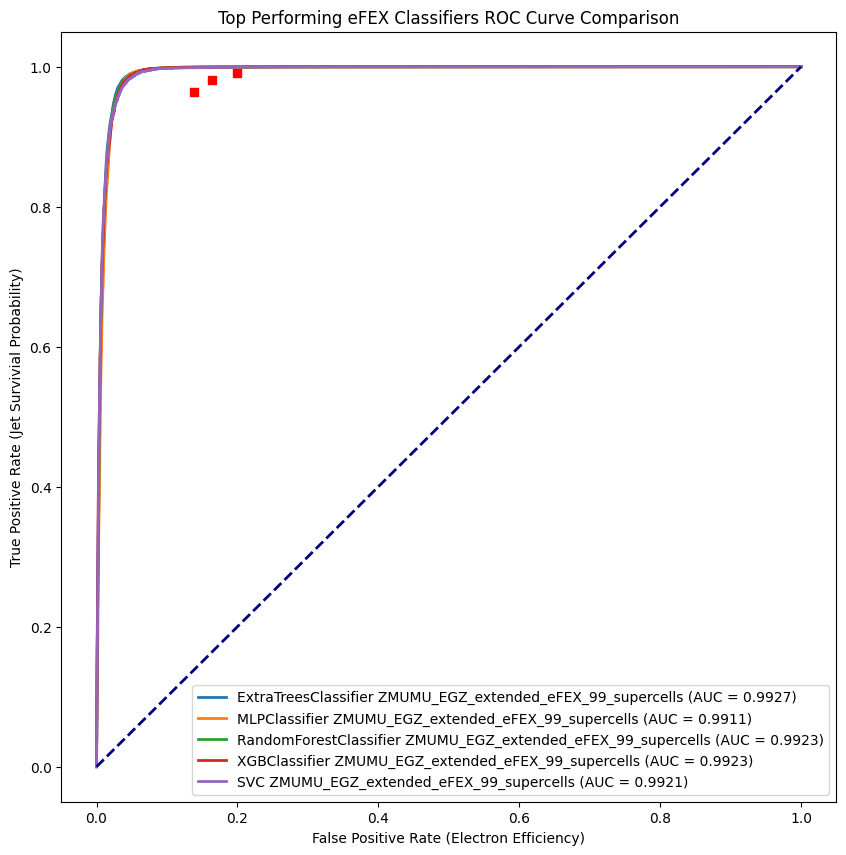

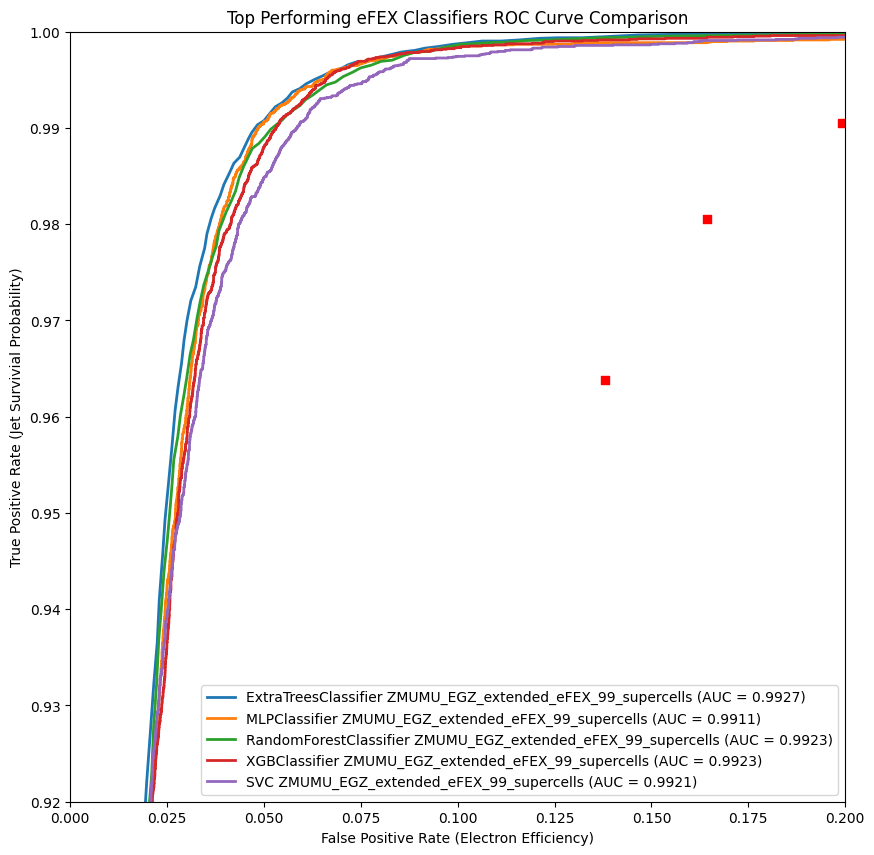

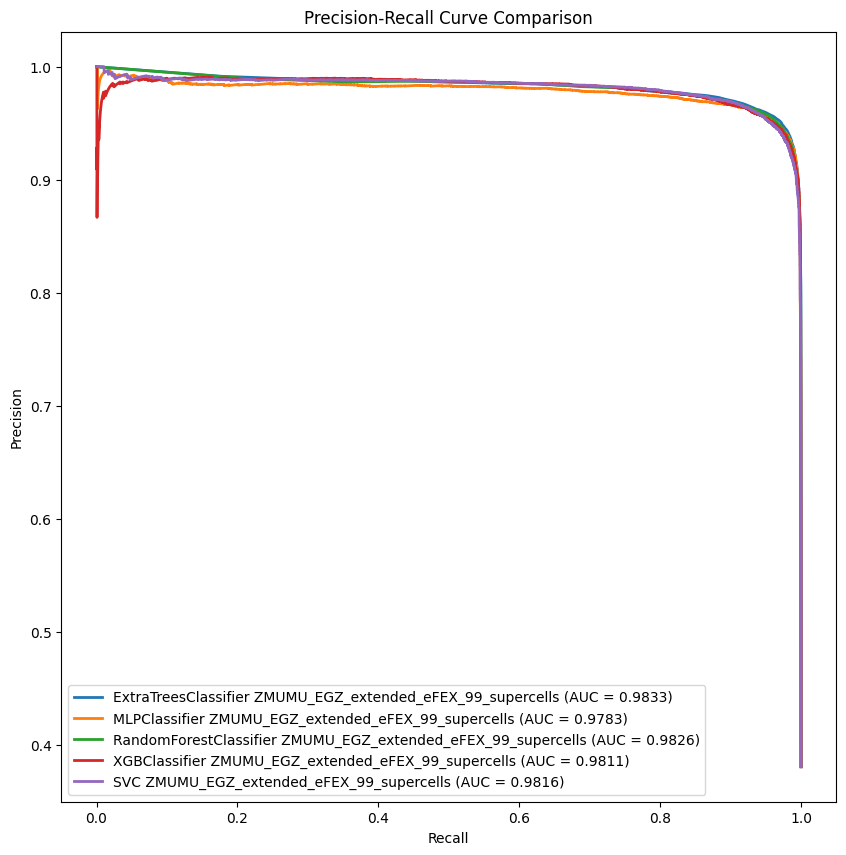

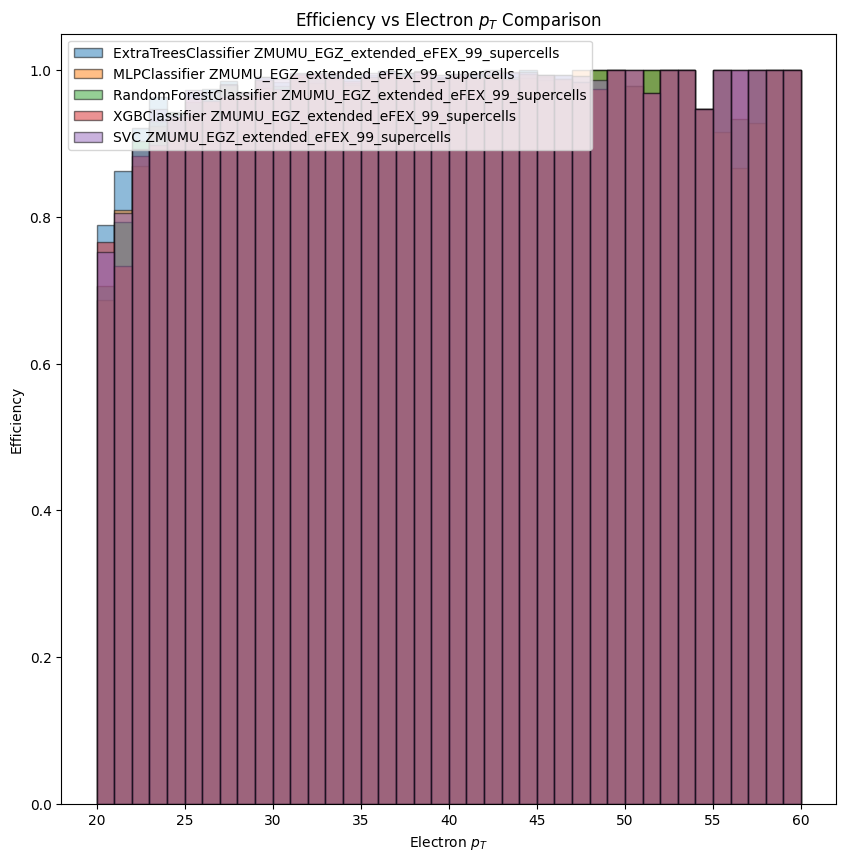

In [18]:
if not (len(classifiers) == len(descriptions) == len(ids)):
    raise ValueError("All input lists must have the same length.")

# Read and plot ROC data
plt.figure(figsize=figsize)
for classifier, desc, id_ in zip(classifiers, descriptions, ids):
    fpr, tpr, roc_auc = read_roc(classifier, desc, id_)
    if fpr and tpr:
        plt.plot(fpr, tpr, lw=2, label=f"{classifier} {id_} (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlabel('False Positive Rate (Electron Efficiency)')
plt.ylabel('True Positive Rate (Jet Survivial Probability)')
plt.title('Top Performing eFEX Classifiers ROC Curve Comparison')
plt.legend()
for i in range(1,4):
    plt.scatter(1.-rejection_rates_heuristic[i],id_efficiencies_heuristic[i], color='r', marker='s', label='Heuristic' if i == 1 else '')
plt.show()


# Read and plot ROC data
plt.figure(figsize=figsize)
for classifier, desc, id_ in zip(classifiers, descriptions, ids):
    fpr, tpr, roc_auc = read_roc(classifier, desc, id_)
    if fpr and tpr:
        plt.plot(fpr, tpr, lw=2, label=f"{classifier} {id_} (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 0.2])
plt.ylim([0.92, 1.0])
plt.xlabel('False Positive Rate (Electron Efficiency)')
plt.ylabel('True Positive Rate (Jet Survivial Probability)')
plt.title('Top Performing eFEX Classifiers ROC Curve Comparison')
plt.legend()
for i in range(1,4):
    plt.scatter(1.-rejection_rates_heuristic[i],id_efficiencies_heuristic[i], color='r', marker='s', label='Heuristic' if i == 1 else '')
plt.show()

# Read and plot Precision-Recall data
plt.figure(figsize=figsize)
for classifier, desc, id_ in zip(classifiers, descriptions, ids):
    precision, recall, pr_auc, _ = read_precision_recall(classifier, desc, id_)
    if precision and recall:
        plt.plot(recall, precision, lw=2, label=f"{classifier} {id_} (AUC = {pr_auc:.4f})")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')
plt.legend()
plt.show()

# Read and plot Efficiency vs Electron PT data
plt.figure(figsize=figsize)
for classifier, desc, id_ in zip(classifiers, descriptions, ids):
    bins, eff = read_efficiency_vs_ele_PT(classifier, desc, id_)
    if bins and eff:
        plt.bar(bins[:-1], eff, width=np.diff(bins), alpha=0.5, align='edge', edgecolor='black', label=f"{classifier} {id_}")
plt.xlabel('Electron $p_T$')
plt.ylabel('Efficiency')
plt.title('Efficiency vs Electron $p_T$ Comparison')
plt.legend()
plt.show()